In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import dc_stat_think as dcst
import matplotlib.pyplot as plt 



In [3]:
datos = pd.read_csv(r"C:\Users\ViG\Desktop\DataSets\NHANES.csv")
datos.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN


<Axes: ylabel='Gender'>

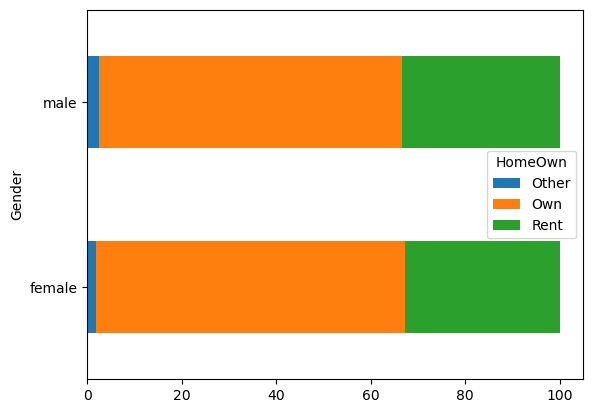

In [4]:
grafico=pd.crosstab(datos.Gender,datos.HomeOwn)
grafico_porcentual= grafico.apply(lambda x: (x*100)/sum(x),axis=1)
grafico_porcentual.plot.barh(stacked=True)

In [5]:
analisis=datos.loc[datos['HomeOwn'].isin(['Own','Rent']),
                  ['Gender','HomeOwn']]
analisis.head()

,Gender,HomeOwn
0,male,Own
1,male,Own
2,male,Own
3,male,Own
4,female,Rent


In [6]:
## Se define una funcion de permutaciones 

def permutation_sample(data1,data2):
    """Genera una muestra permuta a partir de dos conjuntos de datos."""
    
    ##Concatenar los conjuntos de datos: data
    data=np.concatenate((data1,data2))
    
    # Permutar el arreglo concatenado: datos permutados
    permuted_data=np.random.permutation(data)
    
    # Dividr el arreglo permutado en dos
    perm_sample_1=permuted_data[:len(data1)]
    perm_sample_2=permuted_data[len(data1):]
    
    return perm_sample_1,perm_sample_2

In [7]:
perm_sample_1,perm_sample_2= permutation_sample(
                            datos.loc[datos['Gender']=='male',['HomeOwn']],
                            datos.loc[datos['Gender']=='female',['HomeOwn']])

In [8]:
#### Se crea la funcion para definir la diferencia entre proporciones###


def diff_of_props(data_1,data_2,value):
    """Diferencia entre los promedios de dos arreglos"""
    
    # se calcula la diferencia entre las proporciones de datos 1 y datos 2: diff
    diff=np.mean(data_1[:,0]==value) - np.mean(data_2[:,0]==value)
    
    return diff

diff_empiricas_prop=diff_of_props(perm_sample_1,perm_sample_2,'Own')
diff_empiricas_prop



0.0001400022400358525

In [9]:
## Definir una funcion que permita ejecutar mediante un ciclo repetidas veces para generar diferentes permutaciones, para poder comparar resultados
## Para comparar si existe evidencia en la tenencia de hogar entre hombres y mujures

## Permutacion ; una variacion del orden o posicion de los elementos (Intercambio de posiciones sin repeticiones abc , cba, bca). 

def draw_perm_reps(data_1,data_2,func,value,size=1, prop=0):
    """Multiples repeticiones permutadas"""

    
    # Inicializar un arreglo (matrix) un arreglo puede contener una o varias columnas de repeticiones: perm_replicates
    perm_replicates = np.empty(size)
        
        
    for i in range(size):
        # Se genera la muestra permutada 
        perm_sample_1,perm_perm_sample_2 = permutation_sample(data_1,data_2)
        
        ## computar el estadistico de prueba
        
        if prop ==0:
            perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        elif prop == 1:
            perm_replicates[i] = func(perm_sample_1,perm_sample_2,value)  
            
    return perm_replicates

In [10]:
### Probar diferentes tamaños de permutacion , se generan 10 mil permutaciones o replicas en el objeto : perm_replicas
### loc permite seleccionar columnas

perm_replicates = draw_perm_reps(datos.loc[datos['Gender'] == 'male',['HomeOwn']],
                                 datos.loc[datos['Gender'] == 'female',['HomeOwn']],
                                 diff_of_props, value = 'Own', size=10000, prop =1)

In [13]:
### Calcular el estadistico mas importante prueba de hipotesis ( Nula y Alternativa)
## Calcular el valor P segun el valor de tolerancia , para saber si es lo suficientemente grande o pequeño para comrpobar si es suficiente para la muestra estadistica

##p = np.sum(perm_replicates >=diff_empiricas_prop) / len(perm_replicates)

## se agrega abs ya que no importa si el valor es positivo o negativo

p = np.sum(abs(perm_replicates) >= abs(diff_empiricas_prop)) / len(perm_replicates)

## Imprimir resultado
        
print('p-value =',p)

## nivel de significancia es de 0.98 es mayor 0.5 existe evidencia estadistica suficiente para no rechazar la hipotesis nula

p-value = 0.9831


In [16]:
## conclusion grafica o bien regio critica. Primeramente se crean los objetos

## Y se prueban con diferentes niveles de confianza

nv1_95 = np.percentile(perm_replicates,95)
nv1_975 = np.percentile(perm_replicates,97.5)
nv1_995 = np.percentile(perm_replicates,99.5)



nv1_5 = np.percentile(perm_replicates,5)
nv1_275 = np.percentile(perm_replicates,2.5)
nv1_005 = np.percentile(perm_replicates,0.5)

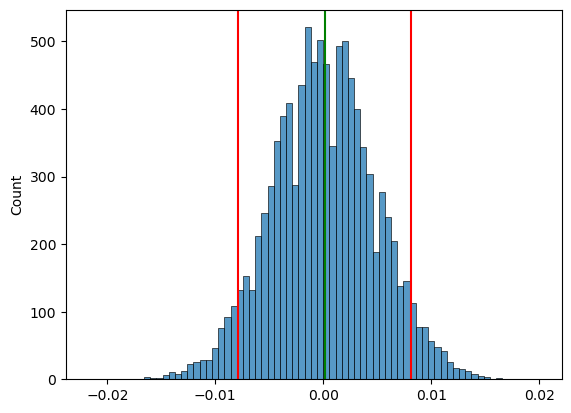

In [19]:
## Graficar para un 90% de confianza

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_95,c="red")
plt.axvline(nv1_5,c="red")

## lA LINEA VERDE no cae en las zonas criticas, al estar centrada demuestra que hay suficiente prueba estadistica para aceptar la hipotesis nula

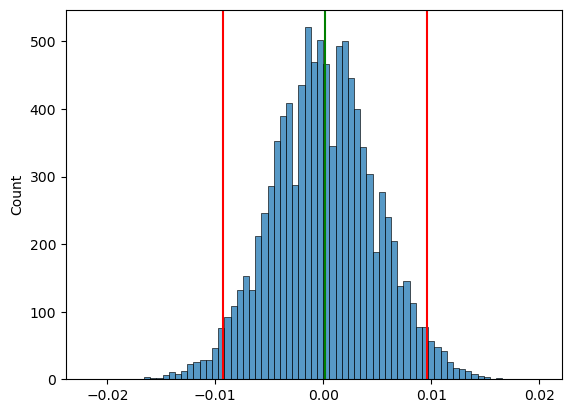

In [20]:
## 95% confianza # La distribucion se mantiene 

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_975,c="red")
plt.axvline(nv1_275,c="red")

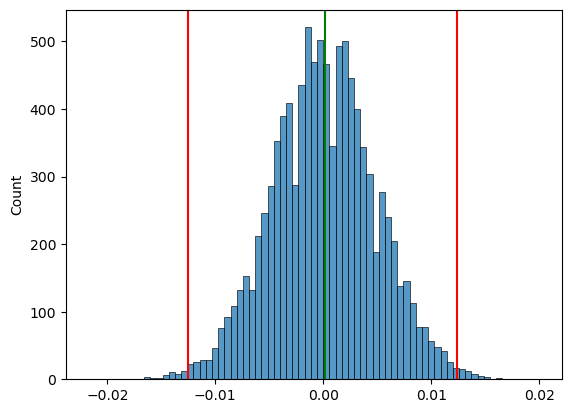

In [21]:
## 99% confianza # La distribucion se mantiene 

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_995,c="red")
plt.axvline(nv1_005,c="red")

<Axes: xlabel='Gender', ylabel='BMI'>

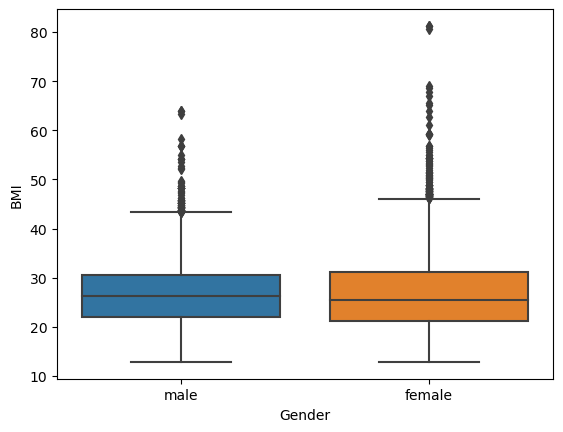

In [22]:
## Verificar si la masa musculae entre hombre y mujeres difiere

## Grafico boxplot para verificar de forma descriptiva si hay diferencias de la muestra entre hombre y mujeres

sns.boxplot(x="Gender", y="BMI", data=datos)

In [23]:
## seleccionar las variable de trabajo 

## crear objeto para guardar las varaibles

analisis_cuantitativo = datos.loc[:, ['Gender', 'BMI']]
analisis_cuantitativo = analisis_cuantitativo.dropna()
analisis_cuantitativo.head()

,Gender,BMI
0,male,32.22
1,male,32.22
2,male,32.22
3,male,15.30
4,female,30.57


In [25]:
perm_sample_1, perm_sample_2 = permutation_sample(
                                analisis_cuantitativo.loc[analisis_cuantitativo['Gender'] == 'male', ['BMI']],
                                analisis_cuantitativo.loc[analisis_cuantitativo['Gender'] == 'female', ['BMI']]
                                )       

In [26]:
def diff_of_means(data_1, data_2):
    
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

In [28]:
diff_empiricas_medias = diff_of_means(perm_sample_1, perm_sample_2)
diff_empiricas_medias

-0.15885041891076312

In [31]:
## Generacion de permutaciones

perm_replicates = draw_perm_reps(analisis_cuantitativo.loc[analisis_cuantitativo['Gender'] == 'male', ['BMI']],
                                 analisis_cuantitativo.loc[analisis_cuantitativo['Gender'] == 'female', ['BMI']],
                                diff_of_means, value="",size = 10000, prop = 0
                                )

In [34]:
## Calcular valor P utilziando libreria numpy, se utilzia valor absoluto para verificar valores negativos y positivos

p = np.sum(abs(perm_replicates) >= abs(diff_empiricas_medias)) / len(perm_replicates)

print('p-value =',p)



p-value = 0.1469


In [35]:
## Confirmar graficamente si existe razon para rechazar la hipotesis nula

nv1_95 = np.percentile(perm_replicates,95)
nv1_975 = np.percentile(perm_replicates,97.5)
nv1_995 = np.percentile(perm_replicates,99.5)



nv1_5 = np.percentile(perm_replicates,5)
nv1_275 = np.percentile(perm_replicates,2.5)
nv1_005 = np.percentile(perm_replicates,0.5)

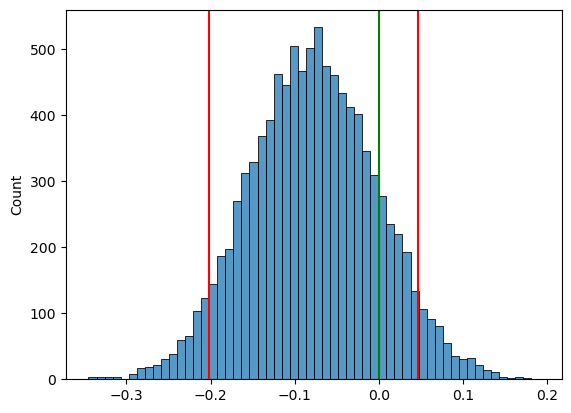

In [36]:
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_95,c="red")
plt.axvline(nv1_5,c="red")


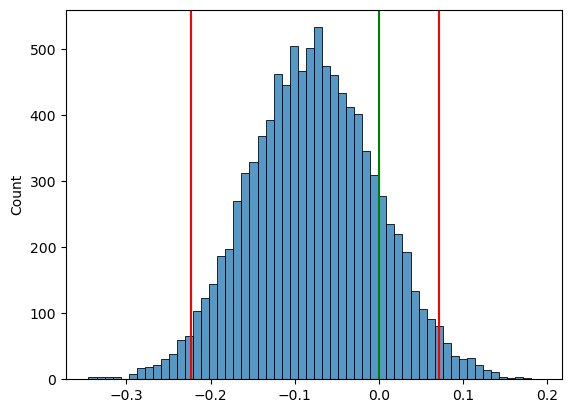

In [37]:
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_975,c="red")
plt.axvline(nv1_275,c="red")

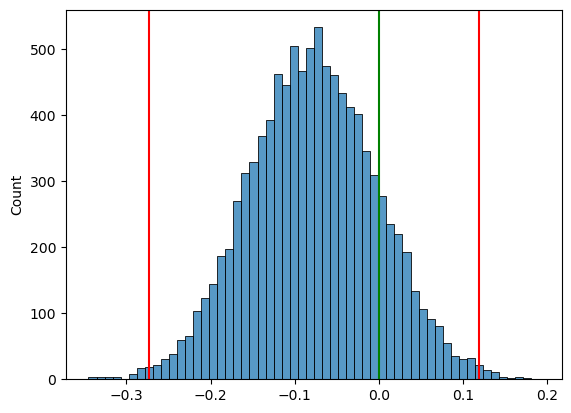

In [38]:
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nv1_995,c="red")
plt.axvline(nv1_005,c="red")